<a href="https://colab.research.google.com/github/jlealsarcos/spwla_2022_machine_learning_workshop/blob/main/Copy_of_Data_Leaders_Prediction_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Introduction to colab, ptyhon jupyter notebooks, and prediction machine for Essec Data Leaders**



##**Professor Jeroen Rombouts, ESSEC Business School, rombouts@essec.edu**

##**Paris apartments**


Target variable: demanded sales price of Paris apartments

• Measure: Price in Euro

• Source: SELOGER

• Sample from 2020: 8899 observations

• We took out apartments more expensive than 2 million Euro and there must be one bedroom at least (no studios)


The purpose is to build an elemetary prediction machine for the price of an apartment in in Paris. For ease of interpretation and attribution, we focus on a regression models.

#**STEP 1: Importing and exploring data**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Note that the Paris apartments data file is in comma separated value (CSV) format which makes is more portable and smaller to store than an Excel file.  For this we will use the very commonly used pandas package which converts the csv files into dataframes. Dataframes are easy to operate with and are much convenient when it comes to doing data analysis. We also import numpy and will call is np. This library allows to call many other functions such as percentiles.

In [ ]:
import pandas as pd
import numpy as np

# Assign a name for the dataframe converted from csv using pd.read_csv
apartments=pd.read_csv('/content/drive/My Drive/selogerdata.csv') 


To know the size of the dataset, we can use shape. We have 8899 apartments in the dataset, and 24 variables are measures for each apartment. The target variable ia the prize of the apartment, its name is "prix" 

In [ ]:
apartments.shape

(8899, 24)

Let us have a look at the imported dataset. The first five observations are given. Note also that Python starts counting from 0 rather than 1. That is, the frist line is line 0.

In [ ]:
apartments.head()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,...,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
0,11,750116,75016,75016,0,178817,144013899,227883,0,0,...,13,3,11,59000,1,0,0,69.00,Appartement,Paris 16√®me
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,...,7,1,8,77500,0,0,0,8.49,Appartement,Paris 10√®me
2,6,750118,75018,75018,0,115811,138648733,108873,0,0,...,8,2,6,94000,0,0,0,37.00,Appartement,Paris 18√®me
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,...,4,1,16,96000,0,0,0,10.26,Appartement,Paris 10√®me
4,4,750116,75016,75016,0,97567,147153067,145098,0,0,...,5,2,4,100000,0,0,0,14.93,Appartement,Paris 16√®me


We define the variable prize to be the variable prix in the dataset

In [ ]:
price=apartments['prix']

Let us do some standard descriptive statistics for the target variable

In [ ]:
apartments['prix'].mean()

1210578.988538038

Rather than using the apartments['prix'] prize variable it is easier to us price

In [ ]:
price.mean()

1210578.988538038

In [ ]:
price.median()


1475000.0

In [ ]:
price.std()


446292.2704384412

In [ ]:
price.min()


59000

In [ ]:
price.max()

2000000

Doing descriptive statistics one by one is too slow if you have many variables to analyze. So we can build our own function.

In [ ]:
def Info(x): # we define a function using the keyword 'def function_name(parameter):'
    meanx = x.mean()
    stddevx = x.std()
    medianx = x.median()
    minx = x.min()
    maxx = x.max()

    print("Average: ")
    print(meanx)
    print("Median: ")
    print(medianx)
    print("Standard deviation: ")
    print(stddevx) 
    print("Min: ")
    print(minx) 
    print("Max: ")
    print(maxx) 


Now the funciton Info(x) exists, we can call if for any variable x we wish

In [ ]:
Info(price)

Average: 
1210578.988538038
Median: 
1475000.0
Standard deviation: 
446292.2704384412
Min: 
59000
Max: 
2000000


Even easier than building our own descriptive statistics function, we can call the inbuilt decribe function

In [ ]:
price.describe(include='all')

count    8.899000e+03
mean     1.210579e+06
std      4.462923e+05
min      5.900000e+04
25%      7.950000e+05
50%      1.475000e+06
75%      1.490000e+06
max      2.000000e+06
Name: prix, dtype: float64



To compute percentiles, we will use a library called numerical python or numpy. 


In [ ]:
np.percentile(price, 10)


494800.00000000006

In [ ]:
apartments.describe(include='all')

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,...,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
count,8899.000000,8899.000000,8899.000000,8899.000000,8899.0,8899.000000,8.899000e+03,8899.000000,8899.0,8899.0,...,8899.000000,8899.000000,8899.000000,8.899000e+03,8899.000000,8899.0,8899.0,8899.000000,8899,8899
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,112
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appartement,Paris 16√®me
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8853,1918
mean,9.531296,751745.680189,75186.144735,75186.144735,0.0,124110.094280,1.473531e+08,136989.252500,0.0,0.0,...,9.697269,3.838746,9.531296,1.210579e+06,0.271716,0.0,0.0,96.070707,NaN,NaN
std,5.765614,16287.896954,1660.091189,1660.091189,0.0,104338.907661,3.661055e+06,109732.960794,0.0,0.0,...,4.511174,1.483164,5.765614,4.462923e+05,0.444869,0.0,0.0,38.127731,NaN,NaN
min,0.000000,750101.000000,75001.000000,75001.000000,0.0,33.000000,7.437284e+07,98.000000,0.0,0.0,...,0.000000,1.000000,0.000000,5.900000e+04,0.000000,0.0,0.0,0.000000,NaN,NaN
25%,5.000000,750108.000000,75008.000000,75008.000000,0.0,39738.000000,1.463174e+08,26516.000000,0.0,0.0,...,6.000000,3.000000,5.000000,7.950000e+05,0.000000,0.0,0.0,66.400000,NaN,NaN
50%,10.000000,750114.000000,75014.000000,75014.000000,0.0,93920.000000,1.486361e+08,123925.000000,0.0,0.0,...,9.000000,4.000000,10.000000,1.475000e+06,0.000000,0.0,0.0,93.000000,NaN,NaN
75%,15.000000,750116.000000,75017.000000,75017.000000,0.0,203657.000000,1.495161e+08,213489.000000,0.0,0.0,...,12.000000,5.000000,15.000000,1.490000e+06,1.000000,0.0,0.0,129.000000,NaN,NaN


#**STEP 2: Visualisation of Data**

Here we look at Histogram, Box-Plots, for the target variable price. For making plots, we need addtional libraries which we import now.

In [ ]:
import matplotlib.pyplot as plt # import this library to visualize plots
import seaborn as sns # another visualization library


##Histogram

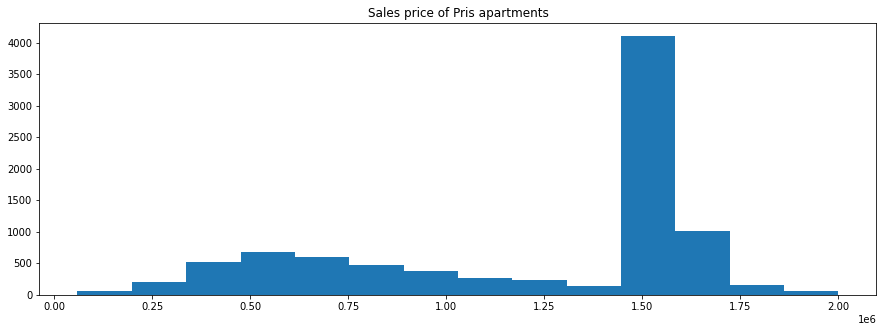

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(price, bins=14) # use the hist() function to plot a basic histogram of the data
plt.title("Sales price of Pris apartments")
plt.show() 

##Box Plot

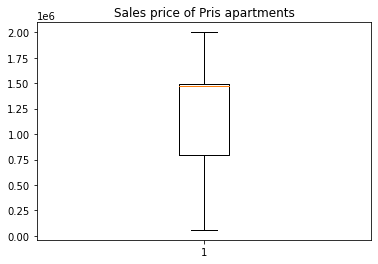

In [ ]:
plt.boxplot(price) # use boxplot() for a simple boxplot visualization
plt.title("Sales price of Pris apartments")
plt.show()

#**STEP 3: Looking for associations between the target and features variables**

We define the surface variable as a first feature variable to predict the apartment price target variable

In [ ]:
surface = apartments['surface']

We compute correlation between price and surface by computing the 2 x 2 correlation matrix. The correlation matrix contains all possible pairs of correlation. On the main diagonal, there are ones by construction since they measure the correlation between a variable and the same variable. The linear correlation coefficient between the price and surface variables is about 75%, that is a strong positive linear relationship exist between the variables.

In [ ]:
np.corrcoef(price,surface)

array([[1.        , 0.75448745],
       [0.75448745, 1.        ]])

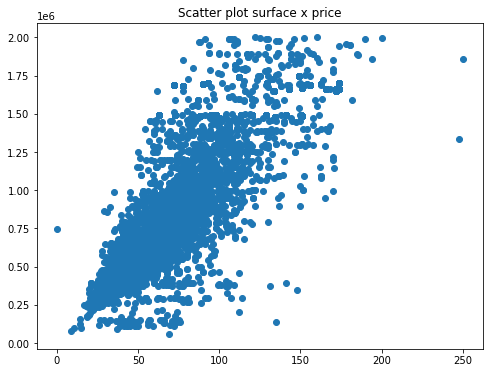

In [ ]:
plt.figure(figsize=(8,6)) #if you wish the change the size of the scatter plot, otherwise put in comments
plt.scatter(surface,price)
plt.title("Scatter plot surface x price")
plt.show()

Let us define a second feature variable "nrooms" respresenting the number of rooms in an apartment. We also do standard descriptive statistics on the variable. From the maximum we see that there is likely a data quality problem. We unlikely have an apartment in Paris with 22 rooms and cheaper than 2 million Euro.

In [ ]:
nrooms = apartments['nb_chambres']
nrooms.describe(include='all')

count    8899.000000
mean        2.319474
std         1.170877
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        22.000000
Name: nb_chambres, dtype: float64

To make sure the 22 rooms is only occuring for a single apartment and therefore is an outlier, we plot the variable nrooms for each of observations. In fact, the data point is very likely an outlier. An invidual inputting the data when putting the apartment for sale, must have made a mistake (The Fat Finger problem...).

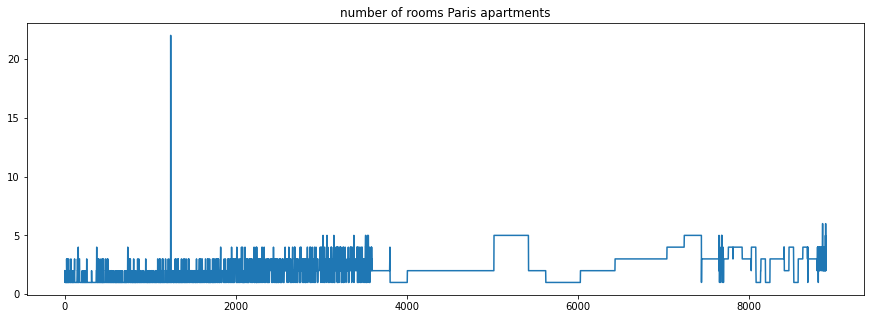

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(nrooms)
plt.title("number of rooms Paris apartments")
plt.show() 

Inspecting both the descriptive statistics and the plot of the number of rooms, there seems to be a typo: 22 rooms rather than 2 rooms. To be really sure, let us locate this specific apartment and check the other variables.

In [ ]:
test =  apartments.loc[apartments['nb_chambres']==22]

In [ ]:
test

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,...,nb_photos,nb_pieces,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville
1236,0,750115,75015,75015,0,260996,146819689,282708,0,0,...,4,3,0,567000,0,0,0,77.0,Appartement,Paris 15√®me


In fact, this apartment is small and not very expensive. Let us replace this 22 by a 2, and re-define again the nrooms variable. We can see that the maximum number of rooms now is 6, which makes much more sense. Note that taking care of outliers at this stage is very important becasue if feeded in the regression model later, this can severaly impact the prediction machine.

In [ ]:
apartments.loc[apartments['nb_chambres']==22, 'nb_chambres'] = 2

In [ ]:
nrooms = apartments['nb_chambres']
nrooms.describe(include='all')

count    8899.000000
mean        2.317227
std         1.152141
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: nb_chambres, dtype: float64

Let us make a scatter plot between price and number of rooms. Note that price is takes many values and is considered as quantitative and continuous, while the number of rooms is quantitative and discrete, which will appear clearly in the scatter plot

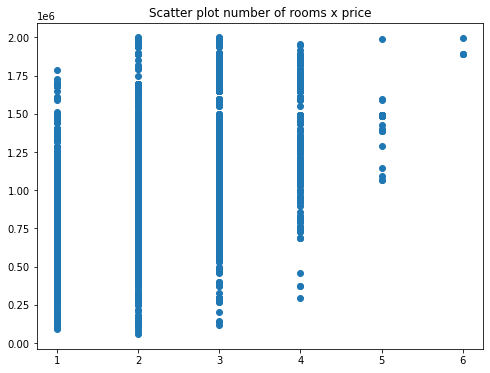

In [ ]:

plt.figure(figsize=(8,6)) #if you wish the change the size of the scatter plot, otherwise put in comments
plt.scatter(nrooms,price)
plt.title("Scatter plot number of rooms x price")
plt.show()

To see in more detail the link between number of rooms and price, we can make a cross tab. However applying directly the crosstab function, we see that there are way too many different prices for the appartments.

In [ ]:
pd.crosstab(nrooms,price,margins=True)

prix,59000,77500,94000,96000,100000,110000,111000,112000,113000,114000,...,1965000,1970000,1974000,1980000,1988000,1990000,1995000,1999000,2000000,All
nb_chambres,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,3,1,1,1,0,...,0,0,0,0,0,0,0,0,0,2391
2,1,1,0,1,0,0,2,0,0,1,...,0,2,0,0,2,2,1,0,1,3213
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2,1,4,0,1,1,2004
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,667
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,620
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
All,1,1,1,1,1,3,3,1,1,1,...,1,2,1,2,3,7,2,1,2,8899


To make a more interesting cross tabulation table, we need to discretize the prize data. That means we will assign each price to a certain category. The categories we choose here correspond to the 9 deciles of the price variable, so the each of the 10 categories contains 10% of the data. Now the cross tab becomes more interesting to interpret.

In [ ]:
apartments['pricedeciles'] = pd.qcut(apartments['prix'], q=10,duplicates='drop')

In [ ]:

pd.crosstab(nrooms,apartments['pricedeciles'],margins=True)

pricedeciles,"(58999.999, 494800.0]","(494800.0, 683600.0]","(683600.0, 935400.0]","(935400.0, 1440000.0]","(1440000.0, 1475000.0]","(1475000.0, 1483200.0]","(1483200.0, 1490000.0]","(1490000.0, 1665000.0]","(1665000.0, 2000000.0]",All
nb_chambres,,,,,,,,,,
1,700,516,269,128,206,0,405,6,161,2391
2,147,330,422,367,823,404,607,24,89,3213
3,39,44,179,306,15,0,607,382,432,2004
4,4,0,20,81,6,0,202,167,187,667
5,0,0,0,10,0,404,202,3,1,620
6,0,0,0,0,0,0,0,0,4,4
All,890,890,890,892,1050,808,2023,582,874,8899


Computing condtional means based ont the number of rooms can be done using the groupby command. We can see that there is a not so strong link between the number of rooms and the apartment price.

In [ ]:
means = apartments.groupby('nb_chambres').mean()
means['prix']

nb_chambres
1    8.806393e+05
2    1.217993e+06
3    1.401404e+06
4    1.526775e+06
5    1.483041e+06
6    1.916250e+06
Name: prix, dtype: float64

#**STEP 4: Regression Analysis**

**Simple regression model**

Now we understand the target and feature variables, we can start making a model to model the target price variable. We will consider a regression model here for ease of exposition and interpreation. The objective function for the regression model is squared Euclidian distance between the target variable and the predicted target variable from the model implied by their parameters.

The estimation method is ordinary least squares (OLS). The paramaters to optimise for in the simple regression model, that is a straight line, is the constant and the slope.

Let us start by such a simple regression model predicting prices with the surface variable. The model can be written as:

$$price_i = \alpha + \beta \; surface_i + \varepsilon_i$$

and the parameters to estimate are $\alpha$ and $\beta$. The OLS method minimises the sum of squared residuals, that is $\sum_{i=1}^n \varepsilon_i^2$. The solution of this method are known in closed form and directly computed for us in Python.


There are different python functions for estimating the regression model. We show two below. One require the variables in a dataset, in our case "apartments". The second allows directly using the variable we defined before. We import also another library for estimating the models.

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
formula = 'prix ~ surface'
results = smf.ols(formula, apartments).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:01:37   Log-Likelihood:            -1.2464e+05
No. Observations:                8899   AIC:                         2.493e+05
Df Residuals:                    8897   BIC:                         2.493e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.621e+05   8418.177     43.019      0.0

Below is another way to do this in Python and you will obtain the same results.

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm


In [ ]:
Y = price
X = surface
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit() 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:01:54   Log-Likelihood:            -1.2464e+05
No. Observations:                8899   AIC:                         2.493e+05
Df Residuals:                    8897   BIC:                         2.493e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.621e+05   8418.177     43.019      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#Interpretation of regression model output

Let us focus on the output of the regression model. The first thing we are interested in is the estimated parameters, since they constitute the basis of any prediction machine.

The estimated model is 

$$\hat{price}_i = 362138.46 + 8831.42 \; surface_i $$

where $\hat{price}_i$ is the predicted price of the apartment in contrast to the observed $price_i$.

Interpretation of the slope 8831.42: the expected increase in asking price for one extra square meter of surface is 8831.42 Euro

Interpretation of constant 362138.46: No useful interpretation here since the constant would mean that 362138.46 Euro is the expected price of an apartment with 0 square meter surface.


The quality of the model is usually measured by the Rsquared criterion. This Rsquared measures the amount of price varation that can be explained by the model. The possible values ranges between 0, no explanatory power, and 1, perfect fit. The Rsquared for this model 56.9% and therefore has some explanatory power but there is definitely room for improvement.

How can we improve this model? The easiest is to think about other features to add to the model. In our example, we also have the number of rooms which should be explaining the variation in prices as well. 

It is important to add the different variables in one model, and not in different models. For example, estimating a regression model with number of rooms, see below, we only get an Rsquared of 21.3%

In [ ]:
formula = 'prix ~ nb_chambres'
results = smf.ols(formula, apartments).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     2407.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:02:13   Log-Likelihood:            -1.2733e+05
No. Observations:                8899   AIC:                         2.547e+05
Df Residuals:                    8897   BIC:                         2.547e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.964e+05   9428.358     84.469      

In [ ]:
print(results.params)

Intercept      796399.550351
nb_chambres    178739.286185
dtype: float64


**Multiple regression model**

Now we build a regression model with two features, this is generally called a multiple regression model. The estimation technique does not change.

The model we will consider is 

$$price_i = \alpha + \beta_1 \; surface_i + \beta_2 \; nrooms_i + \varepsilon_i$$

Interpretation of the coefficients:

$\beta_1$ measures the impact of a unit change in surface keeping the nrooms fixed

$\beta_2$ measures the impact of a unit change in nrooms keeping the surface fixed


In [ ]:
formula = 'prix ~ 100 + 2'
results = smf.ols(formula, apartments).fit()
print(results.summary())

PatsyError: ignored

#Interpretation of regression model output

Keeping the number of bedrooms constant, the expected increase in price for one extra square meter of surface is 13021 Euro.

Keeping the surface constant, the expected decrease in price for one extra room is 170883 Euro. Counterintuitive!


The estimated model is 

$$\hat{price}_i = 355608 + 13021 \; surface_i  −170883 \; nrooms_i$$


The Rsquared for this model is now 63.6% which is a relevant increase compared to the model with surface only. However, improvements are certainly still possible

This goes beyond the learning goals, but one improvement is the inclusion of interaction terms. In our model, having the impact of surface depend on the number of rooms, and vice versa the impact of rooms depend on the surface makes quite a lot of sense. To include such an effect in the model, we can add a new feature variable to the model which is the product of surface and nrooms.

In [ ]:
apartments['surfrooms']=surface*nrooms

In [ ]:
apartments.head()

,number,codeinsee,codepostal,cp,etage,idagence,idannonce,idtiers,idtypechauffage,idtypecommerce,...,position,prix,si_balcon,si_sdEau,si_sdbain,surface,typedebien,ville,pricedeciles,surfrooms
0,11,750116,75016,75016,0,178817,144013899,227883,0,0,...,11,59000,1,0,0,69.00,Appartement,Paris 16√®me,"(58999.999, 494800.0]",138.00
1,8,750110,75010,75010,0,12089,149750677,3765,0,0,...,8,77500,0,0,0,8.49,Appartement,Paris 10√®me,"(58999.999, 494800.0]",16.98
2,6,750118,75018,75018,0,115811,138648733,108873,0,0,...,6,94000,0,0,0,37.00,Appartement,Paris 18√®me,"(58999.999, 494800.0]",37.00
3,16,750110,75010,75010,0,12089,149750679,3765,0,0,...,16,96000,0,0,0,10.26,Appartement,Paris 10√®me,"(58999.999, 494800.0]",20.52
4,4,750116,75016,75016,0,97567,147153067,145098,0,0,...,4,100000,0,0,0,14.93,Appartement,Paris 16√®me,"(58999.999, 494800.0]",14.93


In [ ]:
formula = 'prix ~ 100 + nb_chambres + surfrooms'
results2 = smf.ols(formula, apartments).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     5847.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:03:24   Log-Likelihood:            -1.2354e+05
No. Observations:                8899   AIC:                         2.471e+05
Df Residuals:                    8895   BIC:                         2.471e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.875e+04    1.7e+04     -3.454      

#**STEP 5: Prediction Machine**

One of the great advantages beyond estimation and interpreation of regression models, is the ease to make predictions.

Your job is to price two apartments, based on the first multiple regression output. The first apartment to price is 100 square meters large and has two bedrooms. The second apartment has 250 square meters and 5 bedrooms.



**Questions for you**

Question 1: Your task is to give a predicted price for both apartments. 

Question 2: I would like you to explain which, according to you, of the two apartments is easier to price.

Question 3: How could you improve further your prediction machine given the information in the dataset?


HINT: To print the detailed estimates to make predictions

In [ ]:
print(results.params)

Intercept      355608.070246
surface         13021.102200
nb_chambres   -170883.401864
dtype: float64
